<font color='green'> 
**Youtube - Aladdin Persson Kanalı - TensorFlow 2.0 Beginner Tutorials serisi**
    
TensorFlow Tutorial 17 - Complete TensorBoard Guide - Aladdin Persson anlattı.
</font>

**Video**: [TensorFlow Tutorial 17 - Complete TensorBoard Guide](https://www.youtube.com/watch?v=k7KfYXXrOj0&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=17)

### İçindekiler

**Loading, Preprocessing Dataset and Creating Model**

**1. Tensorboard_callback yazıyoruz.**

**2. Tensorboardı model.fit içerisine ekliyoruz.**

**3. Tensorboardı anaconda prompt aracılığıyla açıyoruz.**

## <font color="blue"> Run Tensorflow Using callback and model.fit</font>

### Loading, Preprocessing Dataset and Creating Model

In [1]:
import io
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    "cifar10",
    split=["train", "test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteUZ8RYE/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteUZ8RYE/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [3]:
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

In [4]:
def augment(image,label):
  if tf.random.uniform((), minval=0, maxval=1) < 0.1:
    image = tf.tile(tf.image.rgb_to_grayscale(image)), [1, 1, 3]

  image = tf.image.random_brightness(image, max_delta=0.1)
  image = tf.image.random_flip_left_right(image)

  return image, label

In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128

ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.prefetch(AUTOTUNE)

In [6]:
def get_model():
  model = keras.Sequential(
      [
       layers.Input((32, 32, 3)),
       layers.Conv2D(8, 3, padding="same", activation="relu"),
       layers.Conv2D(16, 3, padding="same", activation="relu"),
       layers.MaxPooling2D((2,2)),
       layers.Flatten(),
       layers.Dense(64, activation="relu"),
       layers.Dropout(0.1),
       layers.Dense(10),
      ]
  )
  return model

In [7]:
model = get_model()

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

### <font color="black"> 1. Tensorboard_callback yazıyoruz.</font>

In [9]:
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="tb_callback_dir", histogram_freq=1 
)

* `log_dir="tb_callback_dir"` logların tüm izini tutacak log directory belirliyoruz.

* `histogram_freq=1` gradyentlerin ve diğer şeylerin dağılım grafikleri için yazdığımız bir şey.

### <font color="black"> 2. Tensorboardı model.fit içerisine ekliyoruz.</font>

In [10]:
model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test,
    callbacks=[tensorboard_callback], # buraya ekledik
    verbose=2,
)

Epoch 1/5
391/391 - 47s - loss: 1.7110 - accuracy: 0.3811 - val_loss: 1.3843 - val_accuracy: 0.5195
Epoch 2/5
391/391 - 4s - loss: 1.3876 - accuracy: 0.5027 - val_loss: 1.2711 - val_accuracy: 0.5544
Epoch 3/5
391/391 - 4s - loss: 1.2757 - accuracy: 0.5447 - val_loss: 1.1984 - val_accuracy: 0.5795
Epoch 4/5
391/391 - 3s - loss: 1.1886 - accuracy: 0.5785 - val_loss: 1.1253 - val_accuracy: 0.6083
Epoch 5/5
391/391 - 3s - loss: 1.1323 - accuracy: 0.5973 - val_loss: 1.1037 - val_accuracy: 0.6078


* `validation_data=ds_test` sadece göstermek amaçlı yaptık, normalde traini train ve validation diye ayırmamız gerekirdi. 

### <font color="black"> 3. Tensorboardı anaconda prompt aracılığıyla açıyoruz.</font>

1. Kodu çalıştırdığımız dosya dizini görünecek Anaconda Promptta. Tensorflowun bulunduğu environmentı da aktivite etmemiz gerekiyor. [Buradan](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/) bakabilirsin nasıl aktivite edeceğine.

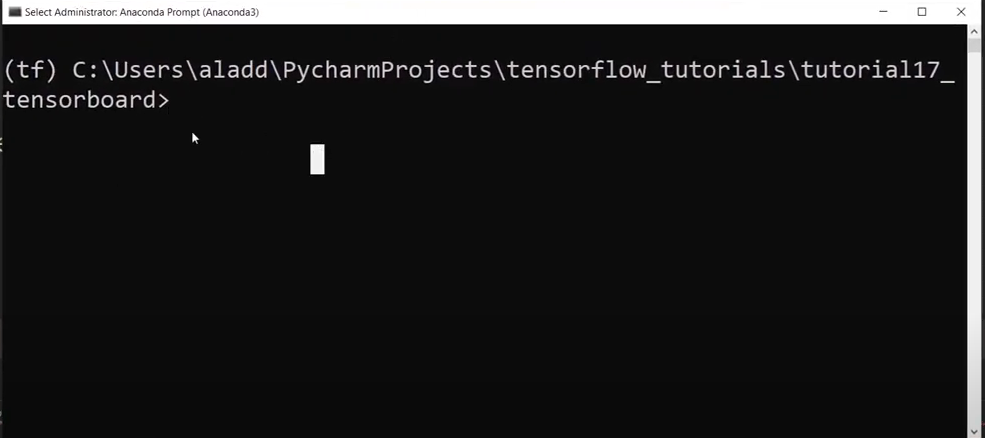

2. Burada aşağıdaki kodda belirtmiş olduğumuz log dizinini yazıyoruz.

```
 tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir="tb_callback_dir", histogram_freq=1 
) 
```

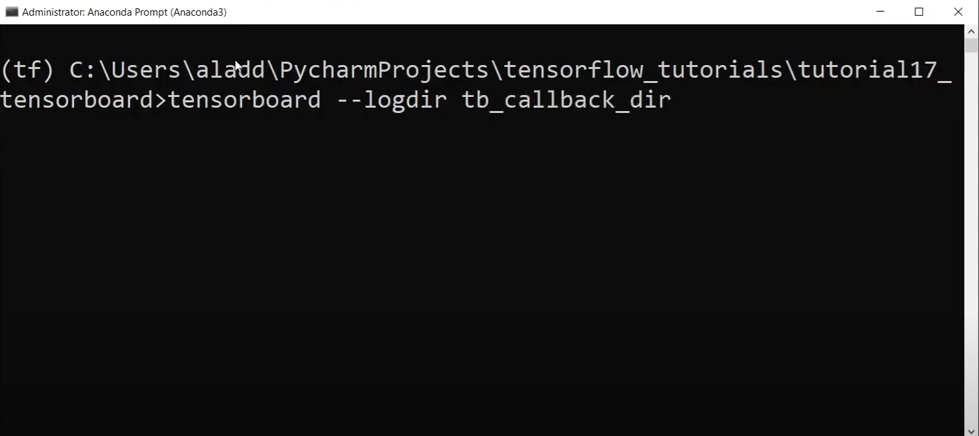

Çalıştırdığımızda bir url alacağız. 

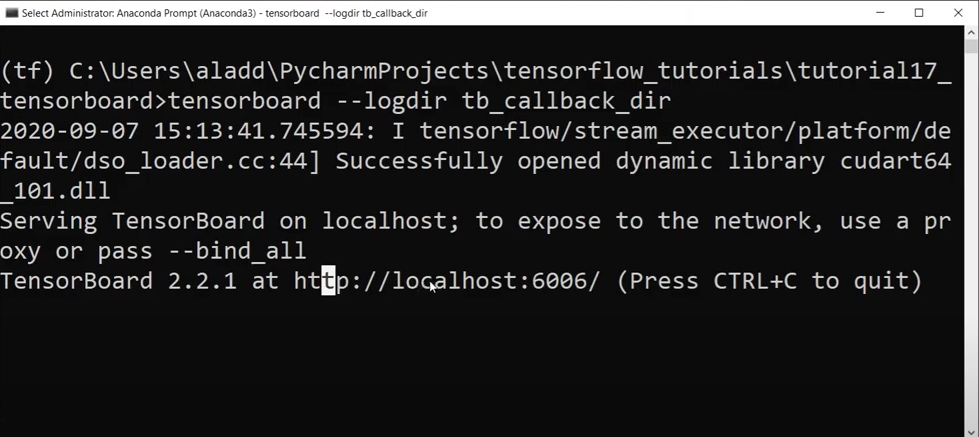

Bu local adrese gittiğimizde train ve validation setinin her epoch için accuracy ve loss functionını göreceğiz. Validationın accuracysinin trainden fazla olmasını data augmentation eklememize bağlayabiliriz. Train overfit olmuyor bu sayede.

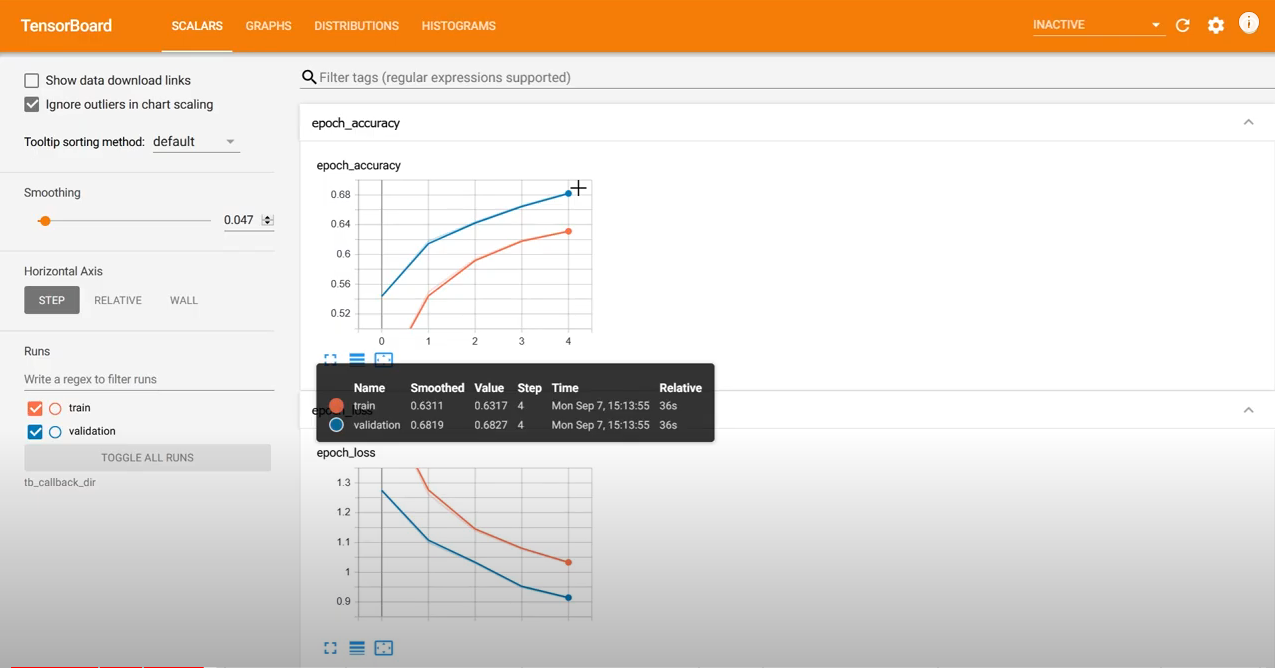

Scalar tabında görüntü bu şekildeydi. Diğer tablara baktığımızda modelin grafiğini görebiliyoruz.

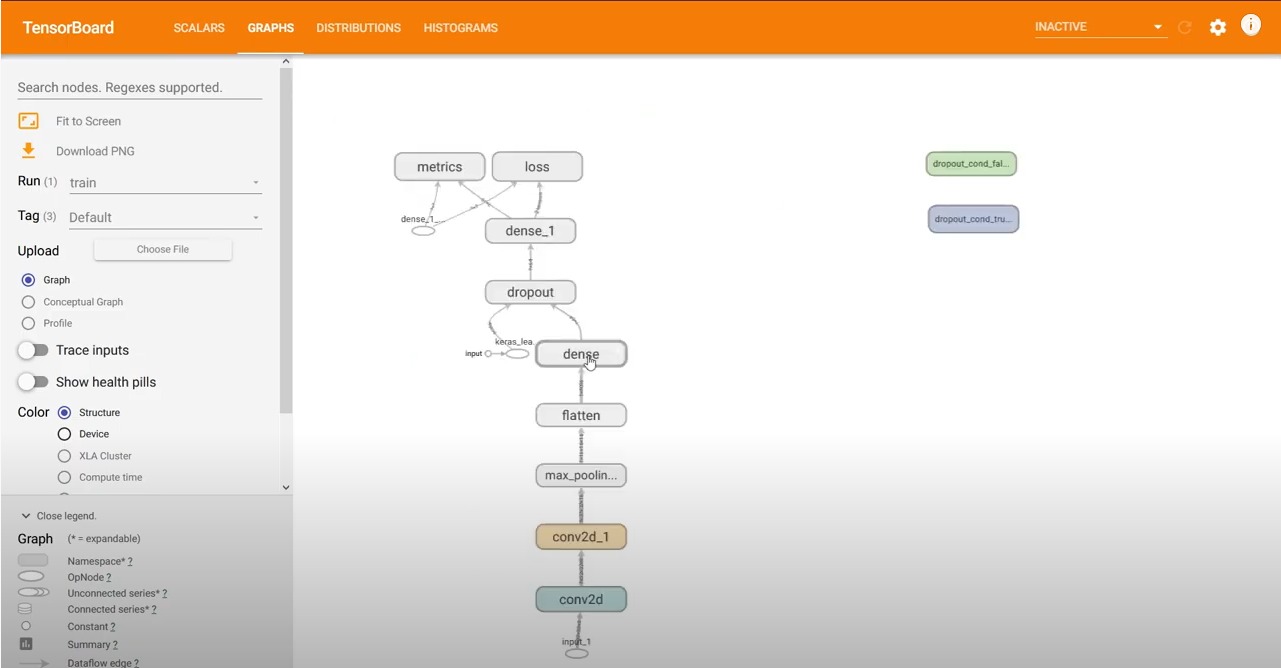

Distributionları görebiliyoruz.

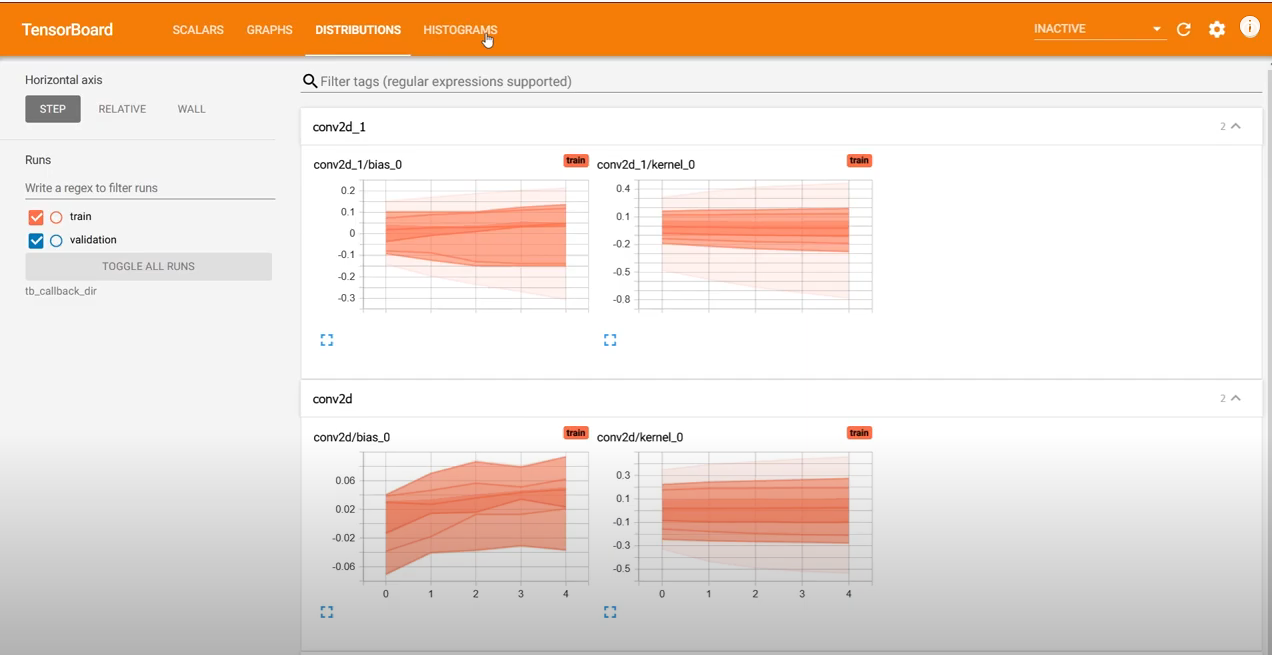

Tüm parametrelerin gradientlerini ve parametrelerin dağılımlarını görebiliyoruz. 

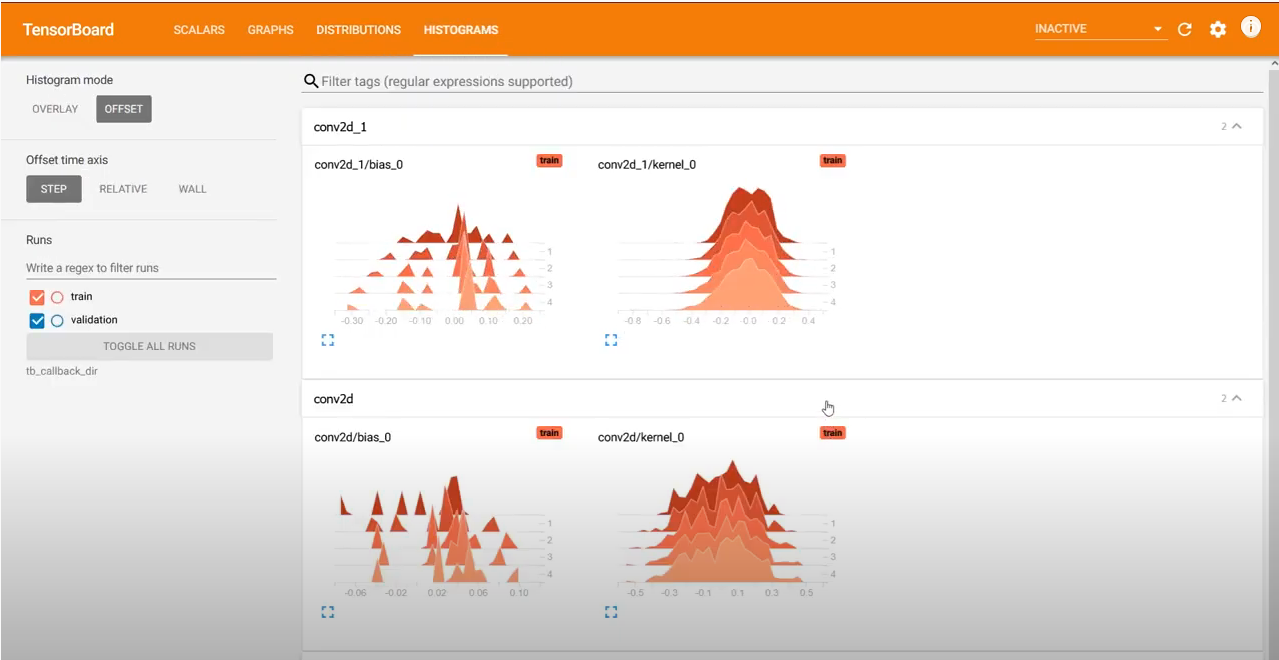